In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from matplotlib.dates import DateFormatter

In [2]:
# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [36]:
rain_scenarios = ["Nieselregen", "MittelstarkerRegen"]
degradation_settings = ["no_degradation", "linear_degradation"]

In [37]:
df = pd.DataFrame()
for rain_scenario in rain_scenarios:
    for degradation_setting in degradation_settings:
        df_metrics = pd.read_csv(os.path.join("systems_output", "normalized", "metrics", "PMMoV", "individual", f"{degradation_setting}_{rain_scenario}.csv"))
        df_metrics["degradation_setting"] = degradation_setting
        df_metrics["rain_scenario"] = rain_scenario
        df = pd.concat([df, df_metrics], ignore_index=True)


In [38]:
df["difference_in_errors"] = df["absolute_error"] - df["absolute_error_unnormalized"]

In [66]:
df.loc[(df.sampling_point == 16),:].groupby(["degradation_setting", "rain_scenario"]).mean()[["sampling_point", "absolute_error", "absolute_error_unnormalized", "difference_in_errors"]].to_latex()

'\\begin{tabular}{llrrrr}\n\\toprule\n &  & sampling_point & absolute_error & absolute_error_unnormalized & difference_in_errors \\\\\ndegradation_setting & rain_scenario &  &  &  &  \\\\\n\\midrule\n\\multirow[t]{2}{*}{linear_degradation} & MittelstarkerRegen & 16.000000 & 80.395335 & 100.674015 & -20.278680 \\\\\n & Nieselregen & 16.000000 & 15.341922 & 17.674551 & -2.332629 \\\\\n\\cline{1-6}\n\\multirow[t]{2}{*}{no_degradation} & MittelstarkerRegen & 16.000000 & 66.076890 & 142.164029 & -76.087138 \\\\\n & Nieselregen & 16.000000 & 16.529288 & 16.225878 & 0.303411 \\\\\n\\cline{1-6}\n\\bottomrule\n\\end{tabular}\n'

/tmp/ipykernel_81604/1364482437.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


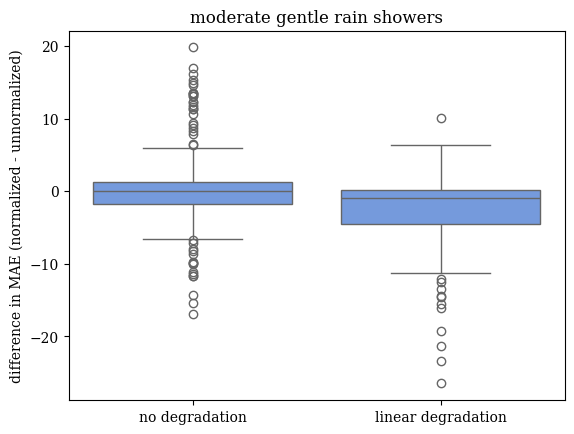

In [67]:
# Assuming df_sub is already defined
df_sub = df.loc[(df.sampling_point == 16) & (df.rain_scenario == "Nieselregen"), :]

# Create the boxplot
fig, ax = plt.subplots()
sns.boxplot(x="degradation_setting", y="difference_in_errors", data=df_sub, ax=ax, color="cornflowerblue")

# Set y-axis label
ax.set_ylabel("difference in MAE (normalized - unnormalized)")
ax.set_xlabel("")

# Set new x-axis labels
new_labels = ['no degradation', 'linear degradation']
ax.set_xticklabels(new_labels)

# Display the plot
plt.title("moderate gentle rain showers")
plt.show()

/tmp/ipykernel_81604/3097099880.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


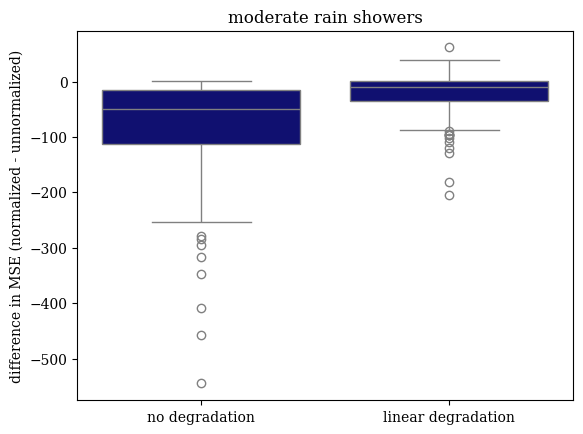

In [58]:
# Assuming df_sub is already defined
df_sub = df.loc[(df.sampling_point == 16) & (df.rain_scenario == "MittelstarkerRegen"), :]

# Create the boxplot
fig, ax = plt.subplots()
sns.boxplot(x="degradation_setting", y="difference_in_errors", data=df_sub, ax=ax, color="navy", linecolor="grey")

# Set y-axis label
ax.set_ylabel("difference in MSE (normalized - unnormalized)")
ax.set_xlabel("")

# Set new x-axis labels
new_labels = ['no degradation', 'linear degradation']
ax.set_xticklabels(new_labels)

# Display the plot
plt.title("moderate rain showers")
plt.show()